In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values
y = np.array(y).reshape(-1,1)
dataset.head(5)

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [59]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))

C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([63.12775856, 71.64301006, 81.97180147, 57.82847523, 80.93120459,
       91.16336626, 60.56757322, 50.90838382, 84.75179919, 68.51284263,
       53.17767259, 52.89209879, 81.16514203, 69.21210199, 72.33831092,
       57.05360345, 67.26043703, 61.49637632, 80.40503264, 62.18746416])

In [61]:
y_test=sc_y.inverse_transform(y_test.reshape(-1,1))

array([59.35885025, 85.23200734, 96.76956643, 55.23166089, 95.45505292,
       93.57611869, 56.87721319, 50.39267014, 70.25193442, 57.25181946,
       52.72549438, 69.89968164, 91.486778  , 75.3312423 , 83.43207142,
       62.12457082, 90.12357207, 44.86249071, 83.14274979, 54.0840548 ])

In [62]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,59.358850,63.127759
1,85.232007,71.643010
2,96.769566,81.971801
3,55.231661,57.828475
4,95.455053,80.931205
5,93.576119,91.163366
6,56.877213,60.567573
7,50.392670,50.908384
8,70.251934,84.751799
9,57.251819,68.512843


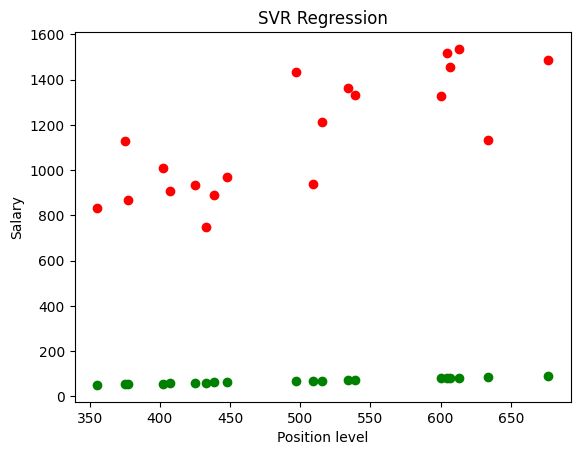

In [68]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test.reshape(-1,1)), sc_y.inverse_transform(y_test.reshape(-1,1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test.reshape(-1,1)), y_pred.reshape(-1), color = 'green')
plt.title('SVR Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

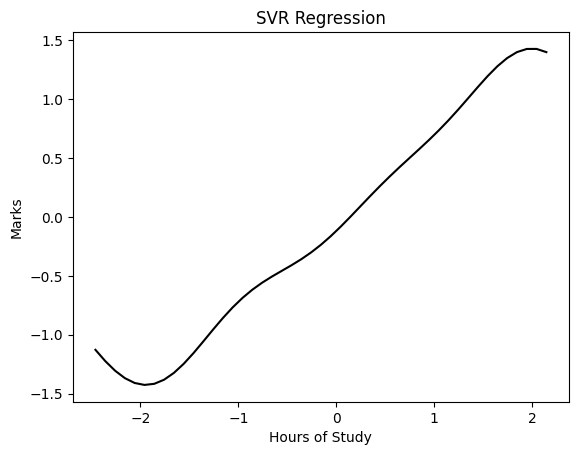